1. Load the Dataset

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load the dataset
data = pd.read_csv('fraudTrain.csv')

# Inspecting the first few rows of the dataset
print(data.head())

# Inspecting the dataset columns
print(data.columns)


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

2. Data Preprocessing

In [41]:
# Check for missing values
print(data.isnull().sum())

# Drop columns that are not needed
data = data.drop(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'], axis=1)

# Check and handle missing values in 'is_fraud'
data = data.dropna(subset=['is_fraud'])

# Identify categorical and numerical columns
categorical_features = ['merchant', 'category', 'gender']
numerical_features = ['amt', 'city_pop']

# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Define features and target variable
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


3. Model Building

Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     16180
         1.0       0.20      0.04      0.06       161

    accuracy                           0.99     16341
   macro avg       0.60      0.52      0.53     16341
weighted avg       0.98      0.99      0.99     16341

[[16156    24]
 [  155     6]]


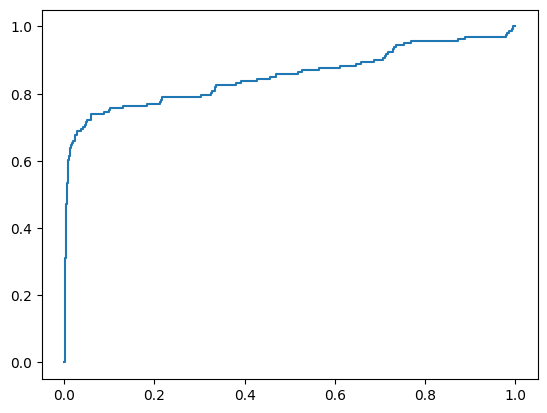

In [46]:
# Logistic Regression with increased max_iter
model.set_params(classifier=LogisticRegression(max_iter=1000))
model.fit(X_train, y_train)

# Predictions
y_pred_lr = model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# ROC Curve
y_prob_lr = model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_lr)))


Decision Tree:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16180
         1.0       0.66      0.72      0.69       161

    accuracy                           0.99     16341
   macro avg       0.83      0.86      0.84     16341
weighted avg       0.99      0.99      0.99     16341

[[16120    60]
 [   45   116]]


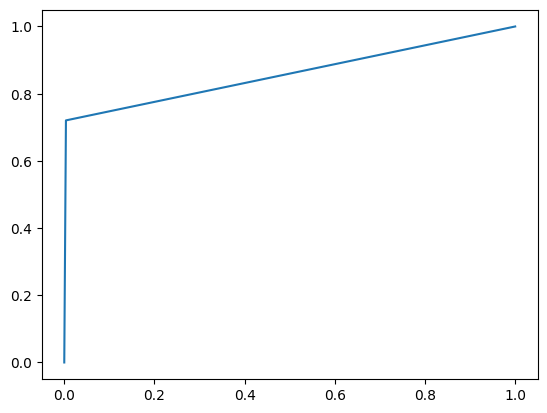

In [43]:
# Decision Tree
model.set_params(classifier=DecisionTreeClassifier())
model.fit(X_train, y_train)

# Predictions
y_pred_dt = model.predict(X_test)

# Evaluation
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# ROC Curve
y_prob_dt = model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_dt)))


Random Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16180
         1.0       0.83      0.66      0.74       161

    accuracy                           1.00     16341
   macro avg       0.91      0.83      0.87     16341
weighted avg       1.00      1.00      1.00     16341

[[16158    22]
 [   54   107]]


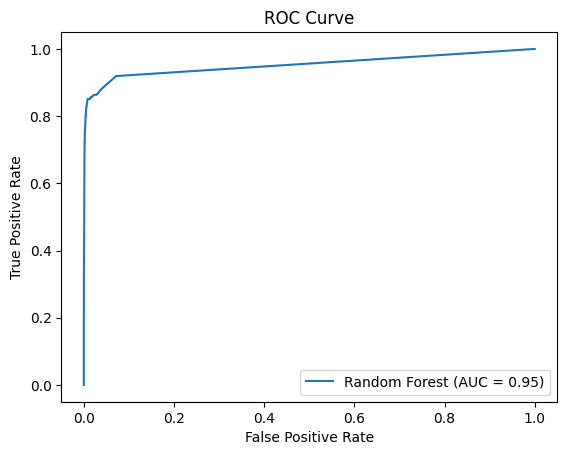

In [44]:
# Random Forest
model.set_params(classifier=RandomForestClassifier())
model.fit(X_train, y_train)

# Predictions
y_pred_rf = model.predict(X_test)

# Evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# ROC Curve
y_prob_rf = model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_prob_rf)))

# Show ROC Curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


4. Model Evaluation

In [45]:
# Print AUC scores
print("AUC Scores:")
print(f"Logistic Regression: {roc_auc_score(y_test, y_prob_lr):.2f}")
print(f"Decision Tree: {roc_auc_score(y_test, y_prob_dt):.2f}")
print(f"Random Forest: {roc_auc_score(y_test, y_prob_rf):.2f}")


AUC Scores:
Logistic Regression: 0.85
Decision Tree: 0.86
Random Forest: 0.95
